# AI落地语言py：入门测试画图

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

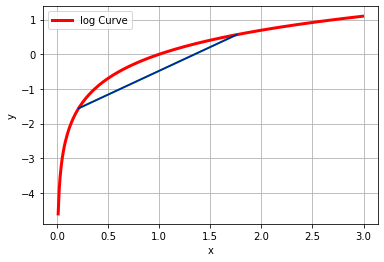

In [2]:
# 在log曲线上连接两点
def myDraw():
    x=[float(i)/100.0 for i in range(1,300)]
    y=[math.log(i) for i in x]
    plt.plot(x,y, 'r-', linewidth=3, label='log Curve')
    #
    a=[x[20], x[175]]
    b=[y[20], y[175]]
    plt.plot(a,b,'g-', linewidth=2)
    plt.plot(a,b,'b-', markersize=15, alpha=0.75)
    #
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
myDraw()

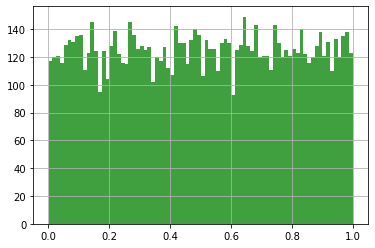

10000
10000


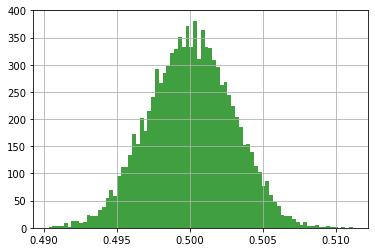

In [3]:
import numpy as np

# 做模型验证：验证中心极限定理
def validateModel():
    #均匀分布
    u=np.random.uniform(0.0, 1.0, 10000)
    plt.hist(u, 80, facecolor='g', alpha=0.75)
    plt.grid(True)
    plt.show()
    #
    # 1万个均匀分布累加/n，很接近正态分布(又叫 高斯分布)
    times=10000
    for time in range(times):
        u += np.random.uniform(0.0, 1.0, 10000)
    print(len(u))
    u /= times
    print(len(u))
    #
    plt.hist(u, 80, facecolor='g', alpha=0.75)
    plt.grid(True)
    plt.show()
#
validateModel()

# 数学背景回忆

## 级数: 累加(n=0, 无穷大, 1/n!)

In [4]:
## my code: 直接算 
def base0(n):
    arr=[1]
    for i in range(1,n):
        arr.append(arr[-1]*i)
    return(arr)
#
#
num=20
for j in range(1,num):
    arr2=base0(j)
    s=0
    for i in range(len(arr2)):
       s+=1/arr2[i] 
    print(j, s) #看来结果是 自然对数的底 e

1 1.0
2 2.0
3 2.5
4 2.6666666666666665
5 2.708333333333333
6 2.7166666666666663
7 2.7180555555555554
8 2.7182539682539684
9 2.71827876984127
10 2.7182815255731922
11 2.7182818011463845
12 2.718281826198493
13 2.7182818282861687
14 2.7182818284467594
15 2.71828182845823
16 2.718281828458995
17 2.718281828459043
18 2.7182818284590455
19 2.7182818284590455


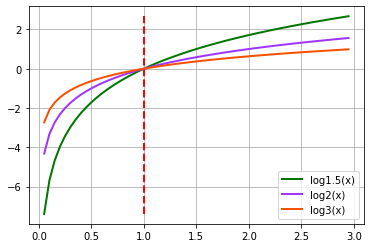

In [5]:
## 对数函数的上升速度
import math
import matplotlib.pyplot as plt
import numpy as np

def test1():
    x=np.arange(0.05, 3, 0.05)
    y1=np.log(x)/math.log(1.5)
    #print(np.log(2.71828), math.log(2.71828))
    plt.plot(x,y1, linewidth=2, color='#007500',label="log1.5(x)")
    #
    plt.plot([1,1], [y1[0], y1[-1]], 'r--', linewidth=2)
    #
    y2=np.log(x)/math.log(2)
    plt.plot(x,y2, linewidth=2, color='#9f35ff',label="log2(x)")
    #
    y3=np.log(x)/math.log(3)
    plt.plot(x,y3, linewidth=2, color='#f75000',label="log3(x)")
    #
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
test1()
# 底>1时单调递增，越大上升越慢。

## 幂指数函数的极值

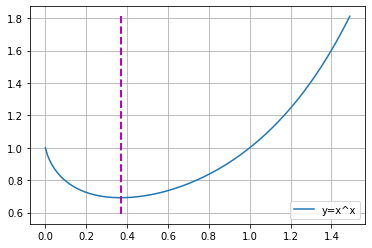

In [6]:
def fn1(x):
    return( x**x )
#fn1(0.01)
def test2():
    x=np.arange(0.00001, 1.5, 0.01)
    y=fn1(x)
    plt.plot(x,y, label="y=x^x")
    plt.plot([1/np.e, 1/np.e], [min(y)-0.1, max(y)], 'm--', linewidth=2) #参考线
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
test2()

In [7]:
# 最小值
x=1/np.e
x**x

0.6922006275553464

# Gini系数的生成

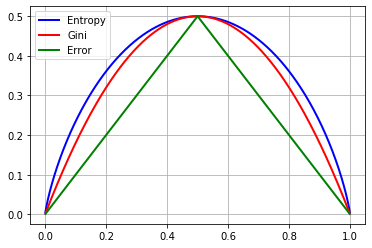

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# if __name__=="__main__":
p=np.arange(0.001, 1, 0.001, dtype=np.float)
gini=2*p*(1-p)
h=-(p*np.log2(p) + (1-p)*np.log2(1-p))/2
err=1-np.max(np.vstack((p, 1-p)), 0) # vstack是啥？
plt.plot(p, h, 'b-', linewidth=2, label="Entropy")
plt.plot(p, gini, 'r-', linewidth=2, label="Gini")
plt.plot(p, err, 'g-', linewidth=2, label='Error')
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

# Gamma函数

[  1   1   2   6  24 120]


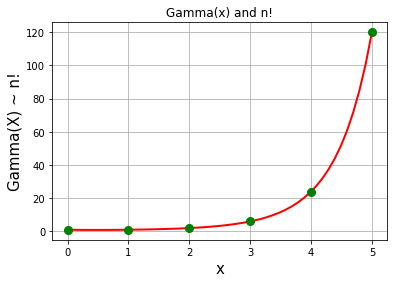

In [21]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.special import factorial

#mpl.r(Params['axes.unicode_minus'])=False
#mpl.r(Params['font.sans-serif'])='SimHei'

N=5
x=np.linspace(0,N,50)
y=gamma(x+1)
plt.figure(facecolor='w')
plt.plot(x,y,'r-', lw=2)

z=np.arange(0,N+1)
f=factorial(z, exact=True)
print(f)
plt.plot(z, f, 'go', markersize=8)
plt.grid(b=True)
#plt.xlim(-0.1, N+0.1)
#plt.ylim(0.5, np.max(y)*1.05)
plt.xlabel('x', fontsize=15)
plt.ylabel('Gamma(X) ~ n!', fontsize=15)
plt.title("Gamma(x) and n!")
plt.show()

[1 1 2]


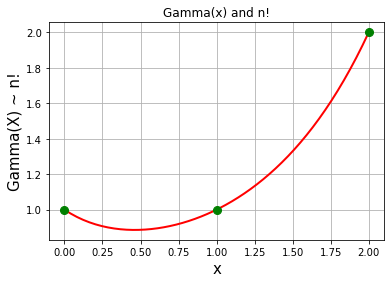

In [22]:
# 更精细的尺度

N=2
x=np.linspace(0,N,50)
y=gamma(x+1)
plt.figure(facecolor='w')
plt.plot(x,y,'r-', lw=2)

z=np.arange(0,N+1)
f=factorial(z, exact=True)
print(f)
plt.plot(z, f, 'go', markersize=8)
plt.grid(b=True)
#plt.xlim(-0.1, N+0.1)
#plt.ylim(0.5, np.max(y)*1.05)
plt.xlabel('x', fontsize=15)
plt.ylabel('Gamma(X) ~ n!', fontsize=15)
plt.title("Gamma(x) and n!")
plt.show()

# f(x1,x2)=log(e^x1+e^x2) 的曲线

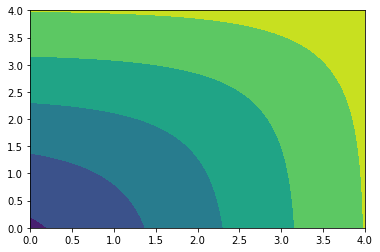

In [30]:
fig=plt.figure()
ax=fig.add_subplot(111)
u=np.linspace(0, 4, 1000)

x,y=np.meshgrid(u,u) #??
z=np.log(np.exp(x) + np.exp(y))
ax.contourf(x, y, z, 5) #最后一个参数表示渐变精细程度:3 粗糙, 20好一点，50更精细
plt.show()

# 首位数字的概率[1, N!]

In [47]:
def first_digital(x):
    x=str(x)
    x=x[0:1]
    return( int(x) )
first_digital(29909)

2

[30, 18, 13, 7, 7, 7, 3, 10, 5]


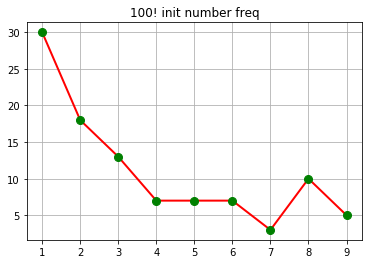

In [69]:
def demo1(N):
    n=1
    frequency=[0]*9
    for i in range(1, N):
        n *=i
        m=first_digital(n)-1
        frequency[m]+=1
    print(frequency)
    x=[x for x in range(1,10)]
    plt.plot(x,frequency, 'r-', linewidth=2)
    plt.plot(x, frequency, 'go', markersize=8)
    plt.grid(True)
    plt.title(str(N-1)+"! init number freq")
    plt.show()
demo1(N=101)

[293, 176, 124, 102, 69, 87, 51, 51, 47]


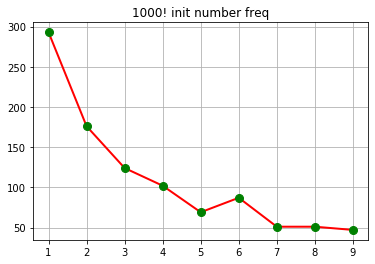

In [70]:
demo1(N=1001)

[2956, 1789, 1276, 963, 794, 715, 571, 510, 426]


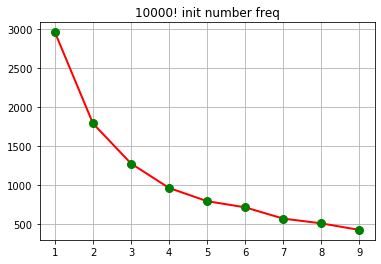

In [71]:
demo1(N=10001) #超级慢

In [76]:
aa=[2956, 1789, 1276, 963, 794, 715, 571, 510, 426]
s1=sum(aa)
[x/s1*100 for x in aa]

[29.56,
 17.89,
 12.76,
 9.629999999999999,
 7.9399999999999995,
 7.1499999999999995,
 5.71,
 5.1,
 4.26]

# 二元高斯分布的方差

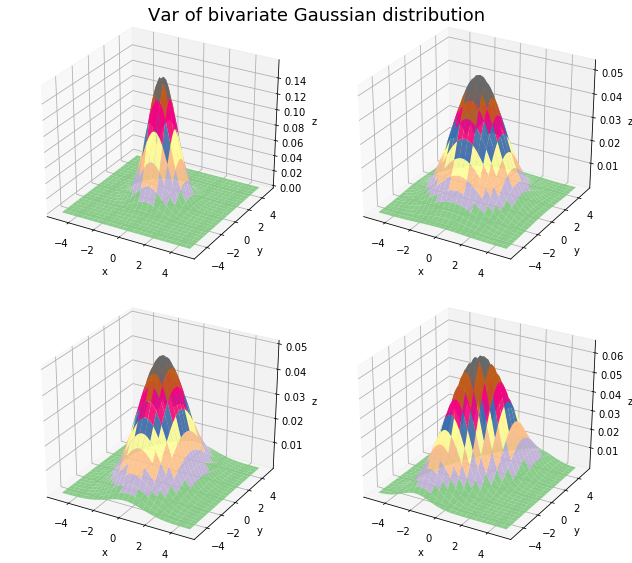

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D #很重要，没有则报错

from matplotlib import cm # should work. Or import matplotlib.cm as cm
# cm 是啥？

def test():
	x1,x2=np.mgrid[-5:5:51j, -5:5:51j]
	x=np.stack( (x1, x2), axis=2)
	
	plt.figure(figsize=(9,8), facecolor='w')
	sigma=(np.identity(2), np.diag((3,3)), np.diag((2,5)), np.array( ((2,1), (2,5)) ))
	for i in np.arange(4):
		ax=plt.subplot(2,2,i+1, projection='3d')
		norm=stats.multivariate_normal((0,0), sigma[i])
		y=norm.pdf(x)
		ax.plot_surface(x1,x2, y, cmap=cm.Accent, rstride=2, cstride=2,alpha=0.9,lw=0.3)
		ax.set_xlabel(u'x')
		ax.set_ylabel(u'y')
		ax.set_zlabel(u'z')
	plt.suptitle(u'Var of bivariate Gaussian distribution', fontsize=18) #二元高斯分布
	plt.tight_layout(1.5)
	plt.show()
test()

## pearson correlation(旋转坐标系)

rotate:  -90.0 , Pearson cor: 1.5959455978986625e-16
rotate:  -64.28571428571428 , Pearson cor: 0.6561139619858374
rotate:  -38.57142857142857 , Pearson cor: 0.7350556998359221
rotate:  -12.857142857142861 , Pearson cor: 0.43455187740032125
rotate:  12.857142857142861 , Pearson cor: -0.43455187740032125
rotate:  38.571428571428584 , Pearson cor: -0.7350556998359221
rotate:  64.28571428571428 , Pearson cor: -0.6561139619858374
rotate:  90.0 , Pearson cor: -1.249000902703301e-16


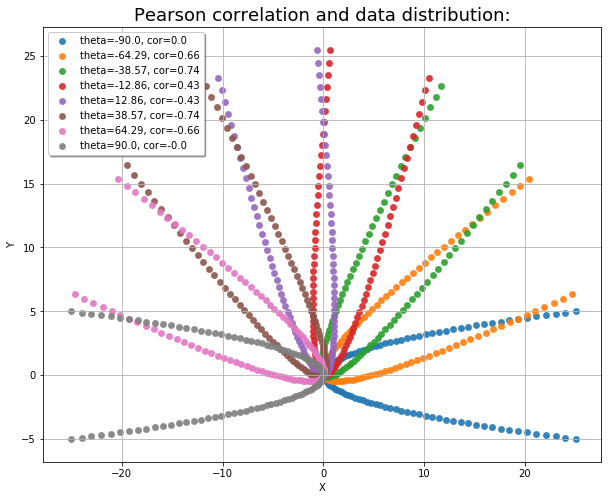

In [40]:
from scipy import stats

def calc_pearson(x,y):
    std1=np.std(x)
    std2=np.std(y)
    cov=np.cov(x,y,bias=True)[0,1]
    return cov / (std1*std2)

# 旋转坐标系
def rotate(valuex,valuey, angle):
    angle=angle/180*math.pi
    rotatex = math.cos(angle)*valuex -math.sin(angle)*valuey
    rotatey = math.cos(angle)*valuey + math.sin(angle)* valuex
    #rotatex = rotatex.tolist()
    #rotatey = rotatey.tolist()
    #xy = rotatex + rotatey
    return rotatex,rotatey
# 数字保留小数，变字符串
def digit2str(di, num=2):
    return str(round(di, num))
#
def pearson(x,y, tip):
    clrs=list('rgbmyc')
    plt.figure(figsize=(10,8), facecolor='w')
    for i, theta in enumerate(np.linspace(-90, 90, 8)):
        xr, yr=rotate(x,y, theta)
        p=stats.pearsonr(xr,yr)[0]
        print('rotate: ', theta, ', Pearson cor:', p)
        #str2=u'Cor: %.3f' % p
        #plt.scatter(xr, yr, s=40, alpha=0.9, linewidths=0.5, c=clrs)
        plt.scatter(xr, yr, s=40, alpha=0.9, linewidths=0.5, 
                    label= 'theta='+digit2str(theta)+", cor="+digit2str(p,2) )
    plt.legend(loc='upper left', shadow=True)
    plt.xlabel(u'X')
    plt.ylabel(u'Y')
    plt.title(u'Pearson correlation and data distribution:%s' % tip, fontsize=18)
    plt.grid(b=True)
    plt.show()

x=np.linspace(-5,5,100)
y=np.power(x,2)
pearson(x,y,'')

# 中心极限定理 实验

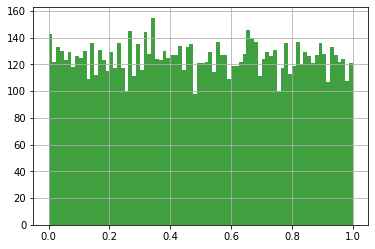

10000
10000


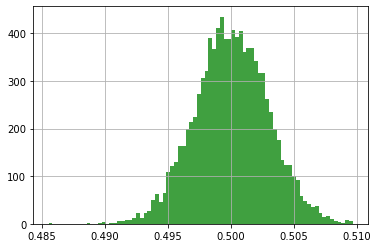

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def test3():
    u=np.random.uniform(0.0, 1.0, 10000)
    plt.hist(u, 80, facecolor='g', alpha=0.75)
    plt.grid(True)
    plt.show()
    
    times=10000
    for time in range(times):
        u+=np.random.uniform(0.0, 1.0, 10000)
    print(len(u))
    u /= times
    print(len(u))
    plt.hist(u, 80, facecolor='g', alpha=0.75)
    plt.grid(True)
    plt.show()
test3()

## SVD 分解压缩图像

In [3]:
import os
#os.chdir(r'D:\xampp\htdocs\txtBlog.py\data\jupyter')
os.chdir(r'G:\ML_MachineLearning\SVD')
os.getcwd()

'G:\\ML_MachineLearning\\SVD'

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=275x166 at 0x16D2A5DDCF8>


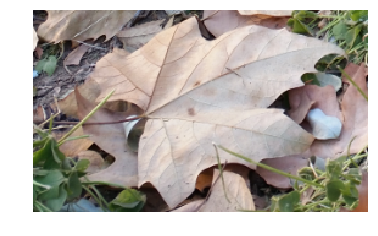

In [39]:
# pip install Pillow -i "https://pypi.doubanio.com/simple/"
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import os
# 读取图片
def getImage(fname):
    A=Image.open(fname, 'r')
    print(A)
    
    # 显示图片
    plt.figure("dog")
    plt.axis('off')# 去掉坐标轴
    plt.imshow(A)
    plt.show()
    return A
# test
img=getImage('dustbin/leaves2.png')

input image array:  (166, 275, 3)


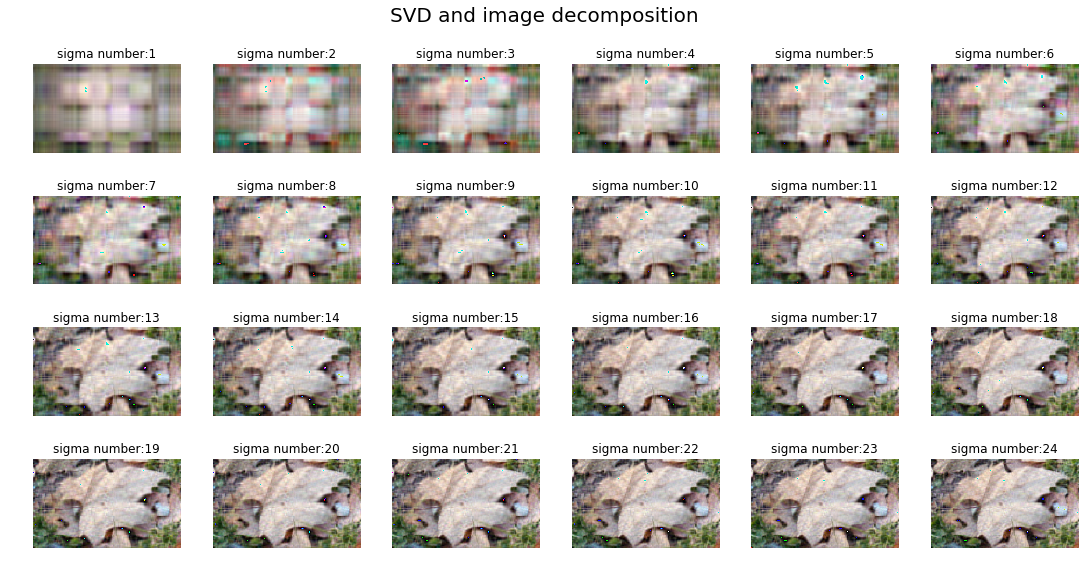

In [40]:
# 复原图像
def restore(sigma, u, v, K): #奇异值，左特征向量，右特征向量，前k个
    #print('--> restore K=', K)
    m=len(u)
    n=len(v[0])
    a=np.zeros((m,n))
    for k in range(K+1):
        for i in range(m):
            a[i] += sigma[k] * u[i][k] * v[k]
    b=a.astype('uint8')
    #Image.fromarray(b).save('svd_'+str(K)+'.png')
    return Image.fromarray(b)
    
# 图片的rgb进行svd分解
def img2SVD(img):
    output_path=r".\dustbin"
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    a0=np.array(img)
    a=a0[0:200, 0:300, :] #高2、宽3
    
    print('input image array: ', np.shape(a))
    # 获取rgb通道的svd分解
    K=40
    u_r,sigma_r, v_r=np.linalg.svd(a[:,:,0])
    u_g,sigma_g, v_g=np.linalg.svd(a[:,:,1])
    u_b,sigma_b, v_b=np.linalg.svd(a[:,:,2])
    
    plt.figure(figsize=(15,8), facecolor='w') # 宽、高
    
    for k in range(1,K+1):
        #print('img2SVD K=', K)
        R=restore(sigma_r, u_r, v_r, k)
        G=restore(sigma_g, u_g, v_g, k)
        B=restore(sigma_b, u_b, v_b, k)
        I=np.stack((R,G,B), axis=2)
        
        Image.fromarray(I).save(output_path+'\svd_'+str(K)+'.jpg')
        
        if k<=24:
            plt.subplot(4,6,k) #4行 6列
            plt.imshow(I)
            plt.axis('off')
            plt.title('sigma number:%d' % k)
    plt.suptitle('SVD and image decomposition', fontsize=20)
    plt.tight_layout(0.3, rect=(0,0,1,0.92))
# test
img2SVD(img)
#print('==end==')